# Programming Assignment 1: Linear Regression

## Part II: MPG (Miles Per Gallon) Analysis

### Import the packages

In class, we have learned linear regression. In this section, we will take through a simple experiment to see how it works. We are going to use `numpy` , `pandas` and `matplotlib` packages in Python, the first thing we need to do is to import them.

In [17]:
%matplotlib inline
# import packages
import numpy as np
import matplotlib.pyplot as plt
import time
# there might be some warnings due to the different versions of python and packages you installed.
# here we choose to suppress these warnings.
# but don't ignore warnings unless you know you are absolutely right!
import warnings
warnings.filterwarnings("ignore")

In this demo, a dataset called MPG(Miles Per Gallon) dataset has been provided which contains the fuel efficiency with different weights of vehicles. Linear regression will be used to train a function fitting the distribution of the data and accurately predict the fuel consumption of different vehicles.

Firstly, the dataset is displayed as follows.

### Display the dataset

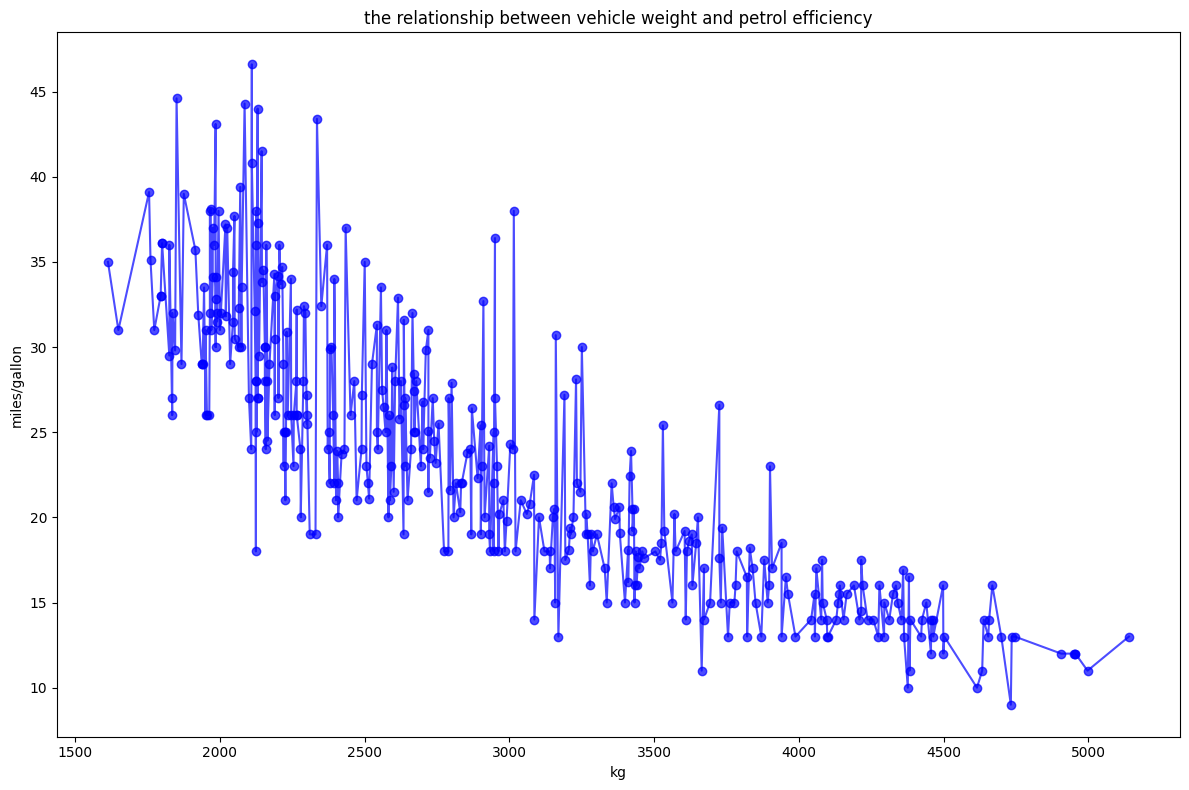

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
data = pd.read_csv('mpg.csv')


# Sort by key 'weight' 
data_sorted_by_weight = data.sort_values(by='weight')

# Set the size of figure
plt.figure(figsize=(12, 8))
# Visualization of: Weight vs MPG
plt.plot(data_sorted_by_weight['weight'], data_sorted_by_weight['mpg'], marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('the relationship between vehicle weight and petrol efficiency')
plt.xlabel('kg')
plt.ylabel('miles/gallon')

# Show the plot
plt.tight_layout()
plt.show()

### Prepare the data

In [19]:
# Split training data and testing data from dataset

# Use sorted data for feature 'weight'
X = data_sorted_by_weight['weight']
y = data_sorted_by_weight['mpg']
train_ratio = 0.7
split_index = int(train_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
y_train

53     35.0
142    31.0
339    39.1
341    35.1
52     31.0
       ... 
275    16.2
358    22.4
298    23.9
224    20.5
260    19.2
Name: mpg, Length: 274, dtype: float64

#### Q1: Fit a Linear Regression model that reflects the relationship between vehicle weight and petrol efficiency based on the first 70% data. Hint: You can reuse the normal equation implementation (linear_regression) in Part 1. Use this model to predict the fuel efficiency for the rest 30% of the data.  Evaluate your model by computing the MSE error.

Slope (k): -0.009722568816963394
Intercept (b): 51.30083812496725
Mean Squared Error (MSE) on test data: 23.41832262263553


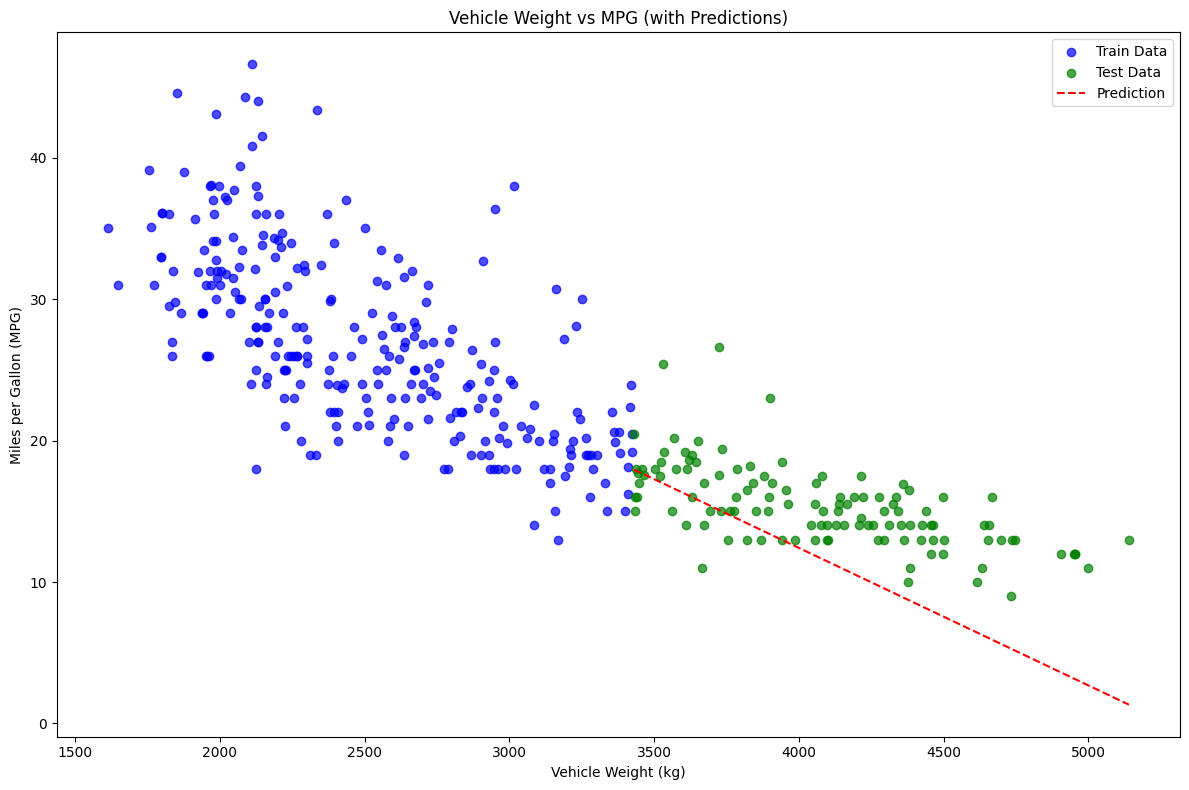

In [20]:
import numpy as np

# Add a column of ones to X for the intercept term (bias)
def add_bias_column(X):
    return np.c_[np.ones(X.shape[0]), X]

# Normal Equation for linear regression
def linear_regression(X, y):
    X_b = add_bias_column(X)  # Add bias term (intercept)
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Normal Equation
    return theta_best

# Predict function
def predict(X, theta):
    X_b = add_bias_column(X)  # Add bias term (intercept)
    return X_b.dot(theta)

# Mean Squared Error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Prepare data
X_train, X_test = X[:split_index].to_numpy().reshape(-1, 1), X[split_index:].to_numpy().reshape(-1, 1)
y_train, y_test = y[:split_index].to_numpy(), y[split_index:].to_numpy()

# Train the model using the normal equation
theta = linear_regression(X_train, y_train)

k = theta[1]
b = theta[0]
print(f"Slope (k): {k}")
print(f"Intercept (b): {b}")
# Predict on test data
y_pred = predict(X_test, theta)

# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on test data: {mse}")


plt.figure(figsize=(12, 8))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.7)

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.7)

# Plot predictions
plt.plot(X_test, y_pred, color='red', linestyle='--', label='Prediction')

# Set title and labels
plt.title('Vehicle Weight vs MPG (with Predictions)')
plt.xlabel('Vehicle Weight (kg)')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()

plt.tight_layout()
plt.show()

#### Q2: Repeat Q1 using ridge regression which is implemented in ***Linear_Regression_Methods***.  

Slope (k): -0.009722568650946575
Intercept (b): 51.30083770894242
Mean Squared Error (MSE) with Ridge Regression: 23.41832040574432


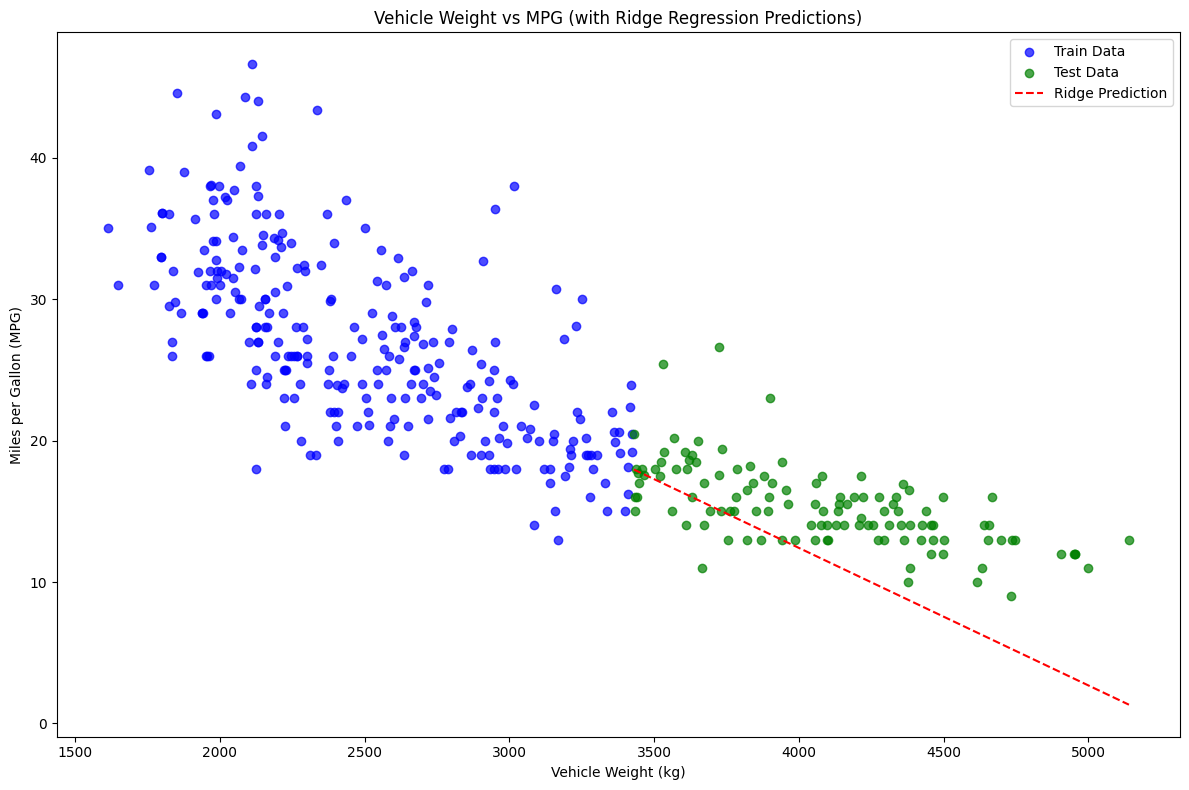

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to add bias column (intercept term)
def add_bias_column(X):
    return np.c_[np.ones(X.shape[0]), X]

# Ridge Regression function
def ridge_regression(X, y, lambda_reg):
    X_b = add_bias_column(X)  # Add bias column (intercept)
    identity_matrix = np.eye(X_b.shape[1])  # Identity matrix
    identity_matrix[0, 0] = 0  # Do not regularize the intercept term (bias)
    theta_best = np.linalg.inv(X_b.T.dot(X_b) + lambda_reg * identity_matrix).dot(X_b.T).dot(y)
    return theta_best

# Predict function
def predict(X, theta):
    X_b = add_bias_column(X)  # Add bias term (intercept)
    return X_b.dot(theta)

# Mean Squared Error (MSE) function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Read the dataset
data = pd.read_csv('mpg.csv')

# Sort data by 'weight'
data_sorted_by_weight = data.sort_values(by='weight')

# Prepare the features and target variables
X = data_sorted_by_weight['weight']
y = data_sorted_by_weight['mpg']

# Split data into training and testing sets
train_ratio = 0.7
split_index = int(train_ratio * len(X))
X_train, X_test = X[:split_index].to_numpy().reshape(-1, 1), X[split_index:].to_numpy().reshape(-1, 1)
y_train, y_test = y[:split_index].to_numpy(), y[split_index:].to_numpy()

# Set regularization parameter (lambda)
lambda_reg = 1.0

# Train the Ridge Regression model
theta_ridge = ridge_regression(X_train, y_train, lambda_reg)

k = theta_ridge[1]
b = theta_ridge[0]
print(f"Slope (k): {k}")
print(f"Intercept (b): {b}")

# Predict on test data
y_pred_ridge = predict(X_test, theta_ridge)

# Evaluate the model using MSE
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (MSE) with Ridge Regression: {mse_ridge}")

# Plot the results: original data vs predictions
plt.figure(figsize=(12, 8))

# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.7)

# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.7)

# Plot the predictions using Ridge Regression
plt.plot(X_test, y_pred_ridge, color='red', linestyle='--', label='Ridge Prediction')

# Set title and labels
plt.title('Vehicle Weight vs MPG (with Ridge Regression Predictions)')
plt.xlabel('Vehicle Weight (kg)')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


#### Q3: Repeat Q1 using locally weighted Linear Regression (locally_weighted_Linear_Regression) implemented in Part i.

Mean Squared Error (MSE) with Locally Weighted Linear Regression: 6.323032114213572


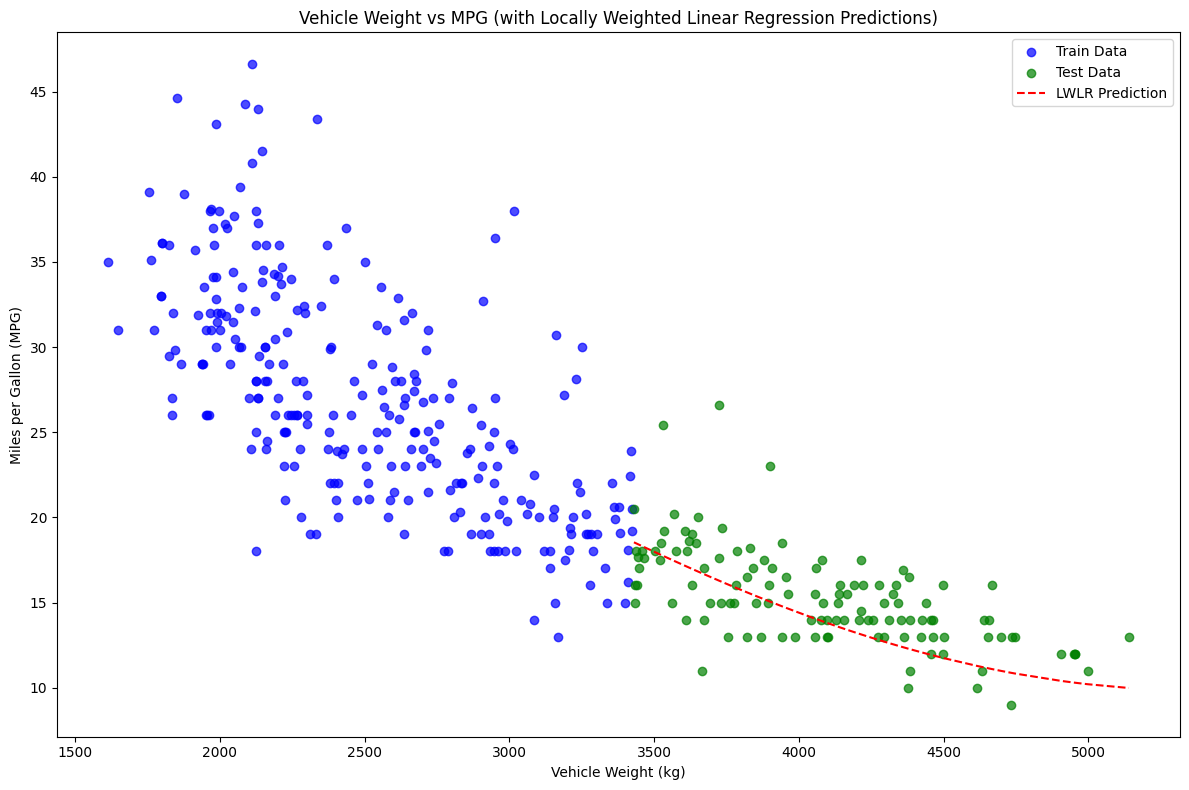

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add bias column (intercept term)
def add_bias_column(X):
    return np.c_[np.ones(X.shape[0]), X]

# Locally Weighted Linear Regression
def locally_weighted_linear_regression(X, y, x_query, tau):
    X_b = add_bias_column(X)  # Add bias column (intercept)
    m = X.shape[0]  # Number of training examples
    
    # Calculate weights for each training example
    W = np.eye(m)  # Initialize weights as identity matrix
    for i in range(m):
        W[i, i] = np.exp(-(X[i] - x_query) ** 2 / (2 * tau ** 2))  # Gaussian kernel
    
    # Normal Equation with weights
    theta = np.linalg.inv(X_b.T.dot(W).dot(X_b)).dot(X_b.T).dot(W).dot(y)
    return theta

# Predict function for LWLR
def predict_lwlr(X_train, y_train, X_test, tau):
    y_pred = np.zeros(X_test.shape[0])
    for i in range(len(X_test)):
        theta = locally_weighted_linear_regression(X_train, y_train, X_test[i], tau)
        y_pred[i] = np.dot(add_bias_column(np.array([X_test[i]])), theta)
    return y_pred

# Mean Squared Error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Read the dataset
data = pd.read_csv('mpg.csv')

# Sort data by 'weight'
data_sorted_by_weight = data.sort_values(by='weight')

# Prepare the features and target variables
X = data_sorted_by_weight['weight'].to_numpy().reshape(-1, 1)
y = data_sorted_by_weight['mpg'].to_numpy()

# Split data into training and testing sets
train_ratio = 0.7
split_index = int(train_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Set the bandwidth parameter (tau)
tau = 500.0  # You can adjust this to control the locality

# Predict using Locally Weighted Linear Regression
y_pred_lwlr = predict_lwlr(X_train, y_train, X_test, tau)

# Evaluate the model using MSE
mse_lwlr = mean_squared_error(y_test, y_pred_lwlr)
print(f"Mean Squared Error (MSE) with Locally Weighted Linear Regression: {mse_lwlr}")

# Plot the results: original data vs predictions
plt.figure(figsize=(12, 8))

# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.7)

# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.7)

# Plot the predictions using LWLR
plt.plot(X_test, y_pred_lwlr, color='red', linestyle='--', label='LWLR Prediction')

# Set title and labels
plt.title('Vehicle Weight vs MPG (with Locally Weighted Linear Regression Predictions)')
plt.xlabel('Vehicle Weight (kg)')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


#### Optional Question: If you correctly implement linear regression on the MPG dataset, you will find it hard to fit a linear model with the given data for its non-linearity. Therefore, in this question you can try to add some non-linearity to your basic linear regression model, e.g. adding logarithmic, polynomial or exponential terms to the model. 
#### (1) Please design and implement an improved model and compare its results with previous methods. 
#### (2) Discuss its advantages and limitations. 

Mean Squared Error (MSE) with Polynomial Regression: 4.863766409142854


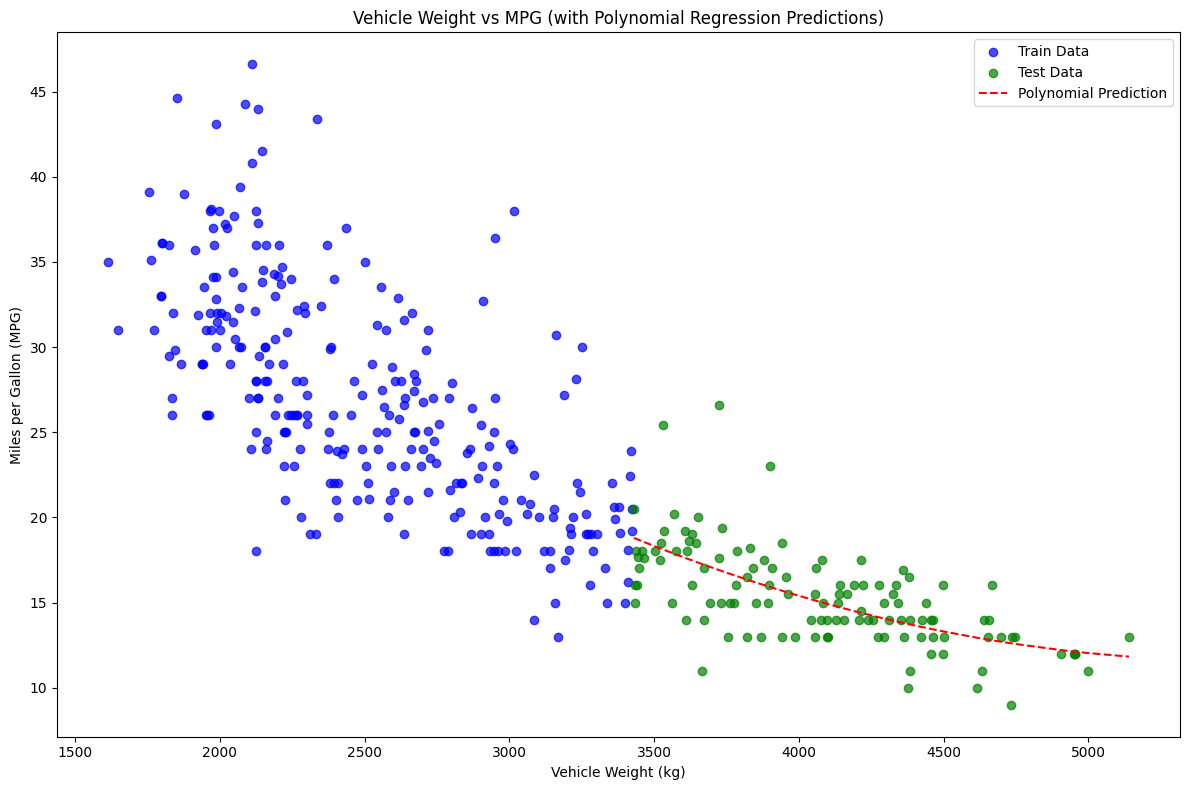

In [23]:
# replace following blanks with your implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Add bias column (intercept term)
def add_bias_column(X):
    return np.c_[np.ones(X.shape[0]), X]

# Normal equation for linear regression
def linear_regression(X, y):
    X_b = add_bias_column(X)
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

# Predict function
def predict(X, theta):
    X_b = add_bias_column(X)
    return X_b.dot(theta)

# Mean Squared Error (MSE) function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Read the dataset
data = pd.read_csv('mpg.csv')

# Sort data by 'weight'
data_sorted_by_weight = data.sort_values(by='weight')

# Prepare the features and target variables
X = data_sorted_by_weight['weight'].to_numpy().reshape(-1, 1)
y = data_sorted_by_weight['mpg'].to_numpy()

# Split data into training and testing sets
train_ratio = 0.7
split_index = int(train_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Polynomial feature transformation (degree 2 for quadratic relationship)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train the polynomial regression model
theta_poly = linear_regression(X_poly_train, y_train)

# Predict using the polynomial model
y_pred_poly = predict(X_poly_test, theta_poly)

# Evaluate the model using MSE
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Mean Squared Error (MSE) with Polynomial Regression: {mse_poly}")

# Plot the results: original data vs predictions
plt.figure(figsize=(12, 8))

# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.7)

# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.7)

# Plot the predictions using Polynomial Regression
plt.plot(X_test, y_pred_poly, color='red', linestyle='--', label='Polynomial Prediction')

# Set title and labels
plt.title('Vehicle Weight vs MPG (with Polynomial Regression Predictions)')
plt.xlabel('Vehicle Weight (kg)')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Now we compare the error outputs of the above four models

Mean Squared Errors for Different Models:
1. Linear Regression: MSE = 23.42
2. Ridge Regression: MSE = 23.42
3. Locally Weighted Linear Regression: MSE = 6.32
4. Polynomial Regression: MSE = 4.86


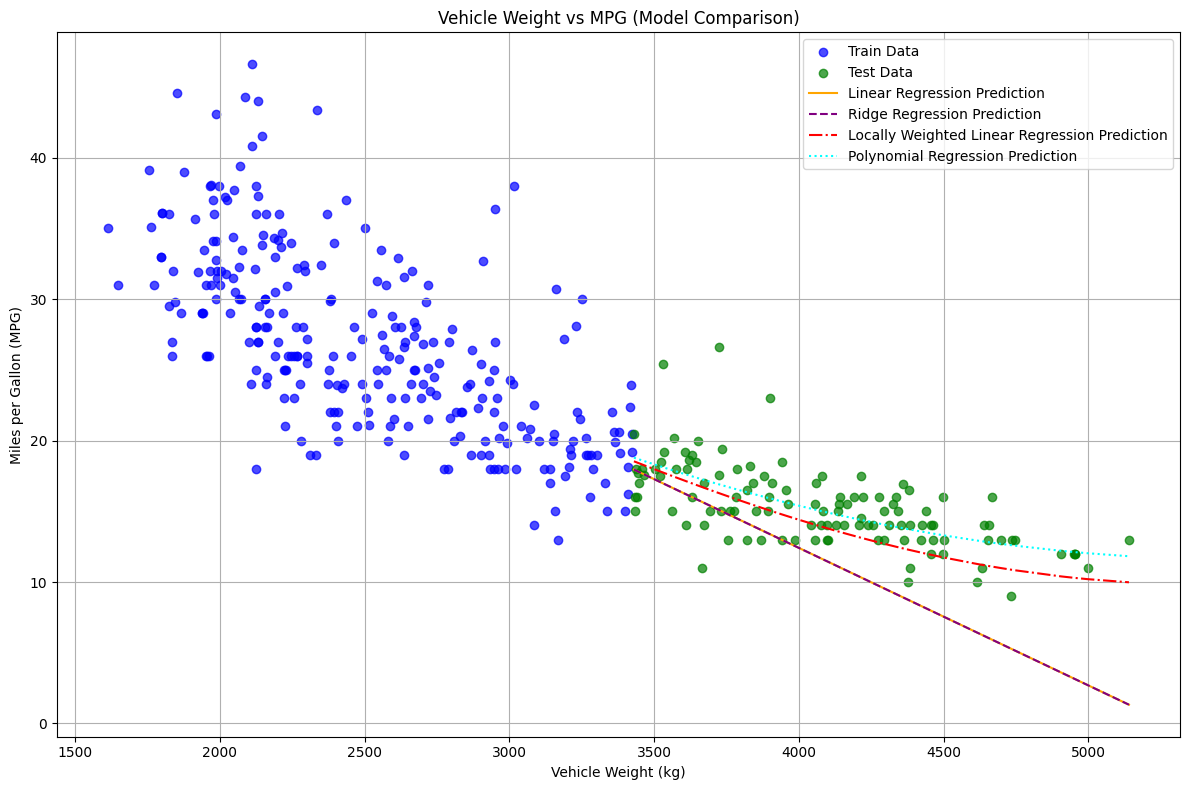

In [24]:
# Output the MSE for different models
print("Mean Squared Errors for Different Models:")
print(f"1. Linear Regression: MSE = {mse:.2f}")
print(f"2. Ridge Regression: MSE = {mse_ridge:.2f}")
print(f"3. Locally Weighted Linear Regression: MSE = {mse_lwlr:.2f}")
print(f"4. Polynomial Regression: MSE = {mse_poly:.2f}")
# Plotting
plt.figure(figsize=(12, 8))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.7)

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.7)

# Plot predictions from different models
plt.plot(X_test, y_pred, color='orange', linestyle='-', label='Linear Regression Prediction')
plt.plot(X_test, y_pred_ridge, color='purple', linestyle='--', label='Ridge Regression Prediction')
plt.plot(X_test, y_pred_lwlr, color='red', linestyle='-.', label='Locally Weighted Linear Regression Prediction')
plt.plot(X_test, y_pred_poly, color='cyan', linestyle=':', label='Polynomial Regression Prediction')

# Set title and labels
plt.title('Vehicle Weight vs MPG (Model Comparison)')
plt.xlabel('Vehicle Weight (kg)')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

### Advantages:
1. **Captures Non-Linearity**: Polynomial regression can model non-linear relationships better than basic linear regression.
2. **Improved Fit**: It reduces prediction error (MSE) significantly in non-linear cases.
3. **Easy to Implement**: It uses a simple linear framework with transformed features.

### Limitations:
1. **Overfitting Risk**: Higher polynomial degrees can lead to overfitting, making the model less generalizable.
2. **Computational Complexity**: More complex models require more computation, especially with large datasets.
3. **Model Instability**: High-degree polynomials can produce unreliable predictions outside the training data range.
4. **Feature Engineering Required**: Finding the right polynomial degree or transformations can complicate model building.

### Comparison with Previous Methods:
- **Basic Linear Regression**: Polynomial regression usually performs better because it handles non-linear relationships that basic linear regression cannot.
- **Ridge Regression**: While it prevents overfitting, it doesn't tackle non-linearity directly. Combining it with polynomial regression might enhance results.
- **Locally Weighted Linear Regression (LWLR)**: LWLR effectively captures non-linear trends but can be slow for large datasets, while polynomial regression offers a more efficient global fit.